In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

is_yerleri = pd.read_excel("is_yeri_verileri.xlsx")

#boş satırları ortalama sütun değerleriyle doldurmak
is_yerleri["Oda Sayısı"] = is_yerleri["Oda Sayısı"].fillna(is_yerleri["Oda Sayısı"].mean())

display(is_yerleri)



,Net Metrekare,Oda Sayısı,Isıtma Tipi,Krediye Uygunluk,Binanın Yaşı,Binanın Kat Sayısı,Fiyat
0,320.0,2.000000,MERKEZI DOĞALGAZ,KREDIYE UYGUN,21 VE ÜZERI,3,7995000
1,149.0,2.000000,KOMBI DOĞALGAZ,KREDIYE UYGUN,5-10,2,3500000
2,100.0,2.000000,KOMBI DOĞALGAZ,KREDIYE UYGUN,16-20,3,1990000
3,89.0,2.000000,MERKEZI (PAY ÖLÇER),KREDIYE UYGUN DEĞIL,5-10,3,5750000
4,199.0,4.000000,MERKEZI (PAY ÖLÇER),KREDIYE UYGUN,5-10,5,7250000
...,...,...,...,...,...,...,...
1000,13.0,1.985597,ISITMA YOK,KREDIYE UYGUN,0 (YENI),23,215000
1001,60.0,1.000000,ISITMA YOK,KREDIYE UYGUN,11-15,3,725000
1002,325.0,1.000000,MERKEZI DOĞALGAZ,KREDIYE UYGUN,2,15,6500000
1003,70.0,1.985597,KOMBI DOĞALGAZ,KREDIYE UYGUN,5-10,4,3250000


In [85]:
#Isıtma tipi verisine one-hot encoding uygulandı
one_hot_kodlama = OneHotEncoder(sparse_output=False)
encoded_data = one_hot_kodlama.fit_transform(is_yerleri[["Isıtma Tipi"]])
encoded_df = pd.DataFrame(encoded_data, columns=[f"{"Isıtma Tipi"}_{i}" for i in range(encoded_data.shape[1])])
is_yerleri = pd.concat([is_yerleri, encoded_df], axis=1)
is_yerleri.drop(["Isıtma Tipi"], axis=1,inplace=True)

#Binanın yaşı verisine one-hot encoding uygulandı
encoded_data = one_hot_kodlama.fit_transform(is_yerleri[["Binanın Yaşı"]])
encoded_df = pd.DataFrame(encoded_data, columns=[f"{"Binanın Yaşı"}_{i}" for i in range(encoded_data.shape[1])])
is_yerleri = pd.concat([is_yerleri, encoded_df], axis=1)
is_yerleri.drop(["Binanın Yaşı"], axis=1,inplace=True)


#Krediye uygunluk verisine label encoding uygulandı
label_kodlama = LabelEncoder()
is_yerleri["Krediye Uygunluk"] = label_kodlama.fit_transform(is_yerleri["Krediye Uygunluk"])

In [86]:
is_yerleri = is_yerleri[is_yerleri['Fiyat'] <= 15000000]
is_yerleri.shape
display(is_yerleri)

,Net Metrekare,Oda Sayısı,Krediye Uygunluk,Binanın Kat Sayısı,Fiyat,Isıtma Tipi_0,Isıtma Tipi_1,Isıtma Tipi_2,Isıtma Tipi_3,Isıtma Tipi_4,...,Isıtma Tipi_7,Binanın Yaşı_0,Binanın Yaşı_1,Binanın Yaşı_2,Binanın Yaşı_3,Binanın Yaşı_4,Binanın Yaşı_5,Binanın Yaşı_6,Binanın Yaşı_7,Binanın Yaşı_8
0,320.0,2.000000,1,3,7995000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,149.0,2.000000,1,2,3500000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,100.0,2.000000,1,3,1990000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,89.0,2.000000,2,3,5750000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,199.0,4.000000,1,5,7250000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,13.0,1.985597,1,23,215000,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,60.0,1.000000,1,3,725000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,325.0,1.000000,1,15,6500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1003,70.0,1.985597,1,4,3250000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [87]:
from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso

X = is_yerleri.drop(["Fiyat"], axis=1)
y = is_yerleri["Fiyat"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

print('x_train :', x_train.shape)
print('x_test :', x_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

x_train : (708, 21)
x_test : (178, 21)
y_train : (708,)
y_test : (178,)


mean absolute error:  1880742.1846557038
Root mean squared error:  2560632.8935770392
Coefficient of determination R^2:  0.5104002682536307


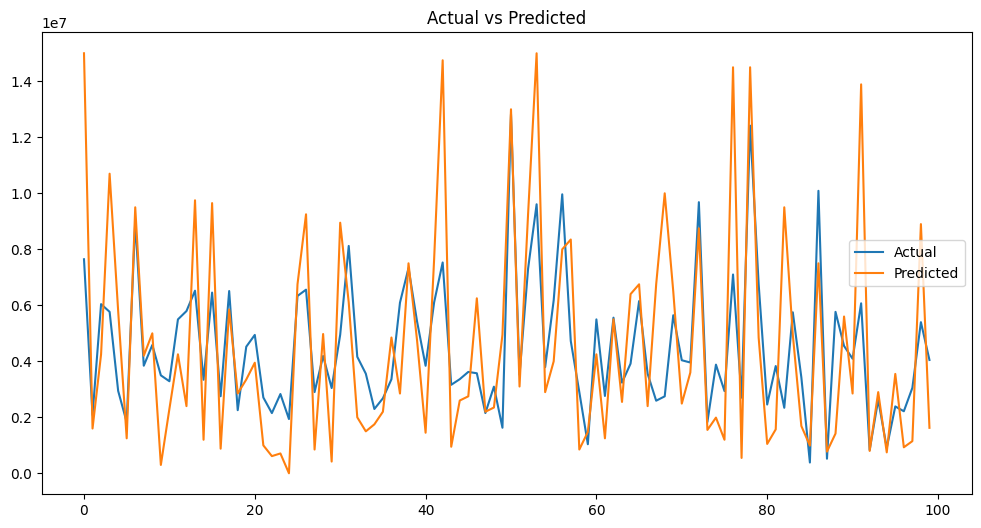

In [88]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_predict = lr.predict(x_test) 
y_predict  

print("mean absolute error: ",mean_absolute_error(y_test, y_predict))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,y_predict)))
print("Coefficient of determination R^2: ",r2_score(y_test,y_predict))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({"Predicted":y_predict,"Actual":y_test})
result = result.reset_index()
result = result.drop(["index"],axis=1)
plt.plot(result[:100])
plt.legend(["Actual","Predicted"])
plt.title("Actual vs Predicted")
plt.show()

Mean absolute error:  2608613.290262172
Root mean squared error:  3753545.300560715
Coefficient of determination R^2:  -0.05203419024309275


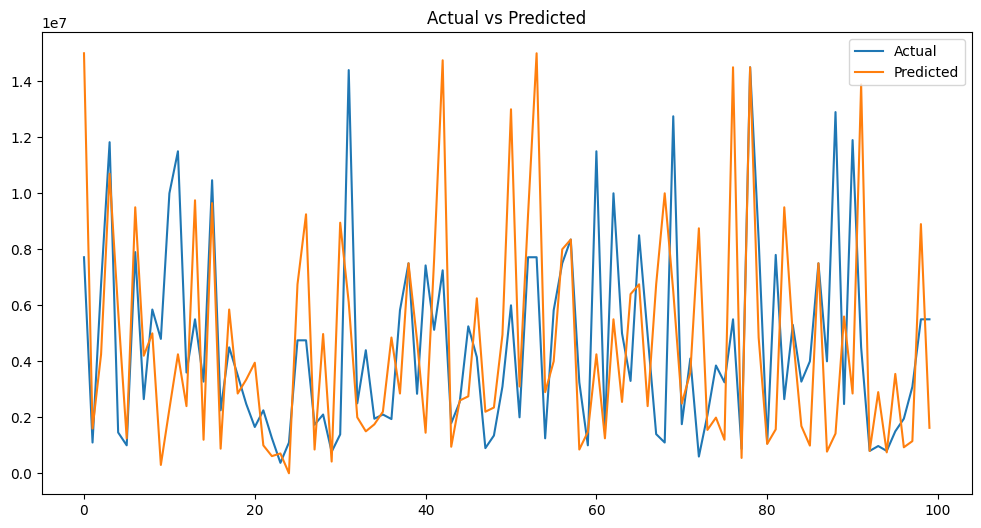

In [89]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion="squared_error", splitter="best")
dt.fit(x_train, y_train)
y_predict_dt = dt.predict(x_test)

print("Mean absolute error: ", mean_absolute_error(y_test, y_predict_dt))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_predict_dt)))
print("Coefficient of determination R^2: ", r2_score(y_test, y_predict_dt))

fig = plt.figure(figsize=(12, 6))
result = pd.DataFrame({'Predicted': y_predict_dt, 'Actual': y_test})
result = result.reset_index()
result = result.drop(["index"], axis=1)

plt.plot(result[:100])
plt.legend(["Actual", "Predicted"])
plt.title("Actual vs Predicted")
plt.show()

Mean Absolute Error:  1856731.962363677
Root Mean Squared Error:  2967770.8072081776
Coefficient of Determination R^2:  0.3423311866899128


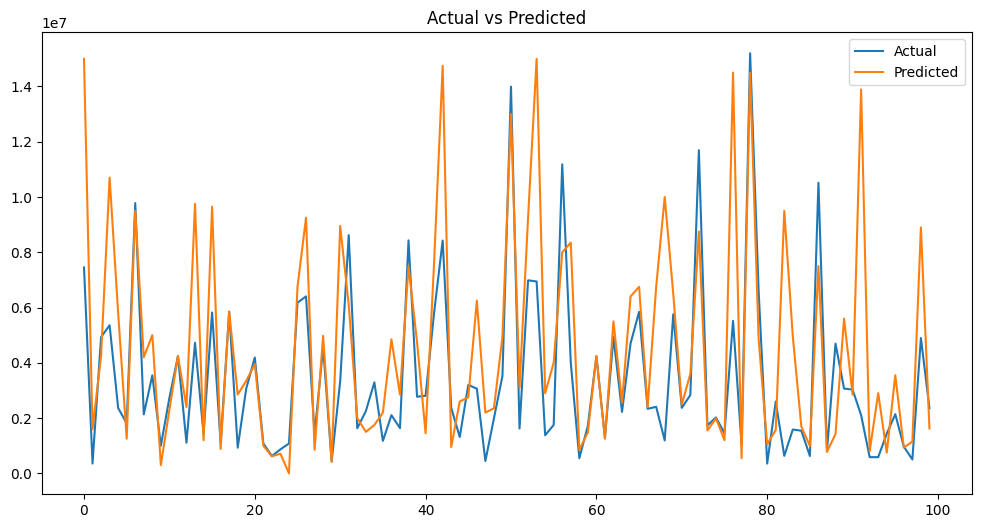

In [90]:
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

passive_aggressive = PassiveAggressiveRegressor()
passive_aggressive.fit(x_train, y_train)
y_predict_passive_aggressive = passive_aggressive.predict(x_test)

print("Mean Absolute Error: ", mean_absolute_error(y_test, y_predict_passive_aggressive))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_predict_passive_aggressive)))
print("Coefficient of Determination R^2: ", r2_score(y_test, y_predict_passive_aggressive))

fig = plt.figure(figsize=(12, 6))
result = pd.DataFrame({"Predicted": y_predict_passive_aggressive, "Actual": y_test})
result = result.reset_index()
result = result.drop(["index"], axis=1)

plt.plot(result[:100])
plt.legend(["Actual", "Predicted"])
plt.title("Actual vs Predicted")
plt.show()

Mean absolute error:  1858293.9278486713
Root mean squared error:  2626971.154955579
Coefficient of determination R^2:  0.4847035633793705


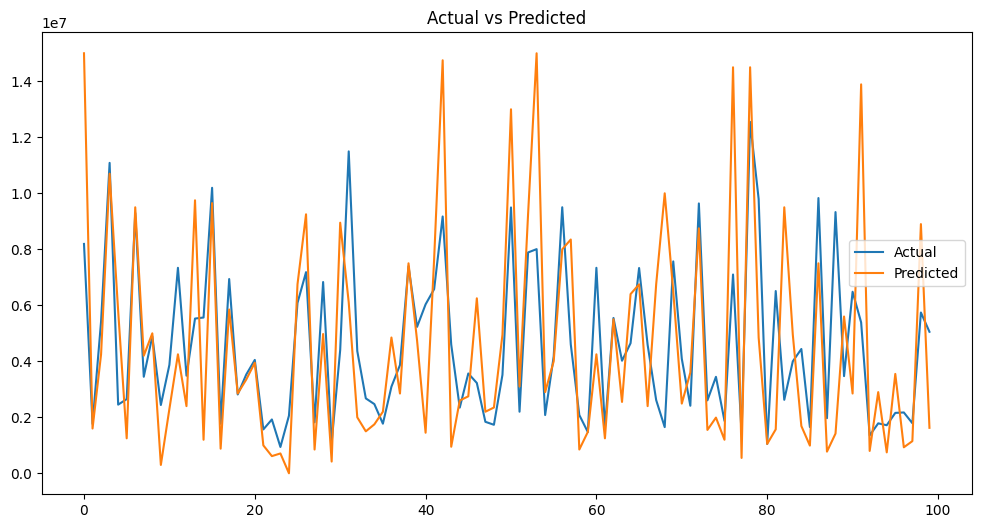

In [91]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)

print("Mean absolute error: ",mean_absolute_error(y_test, y_predict_rf))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print("Coefficient of determination R^2: ",r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({"Predicted":y_predict_rf,"Actual":y_test})
result = result.reset_index()
result = result.drop(["index"],axis=1)

plt.plot(result[:100])
plt.legend(["Actual","Predicted"])
plt.title("Actual vs Predicted")
plt.show()

Mean Absolute Error:  1872761.05418788
Root Mean Squared Error:  2551357.749221831
Coefficient of Determination R^2:  0.5139407084166185


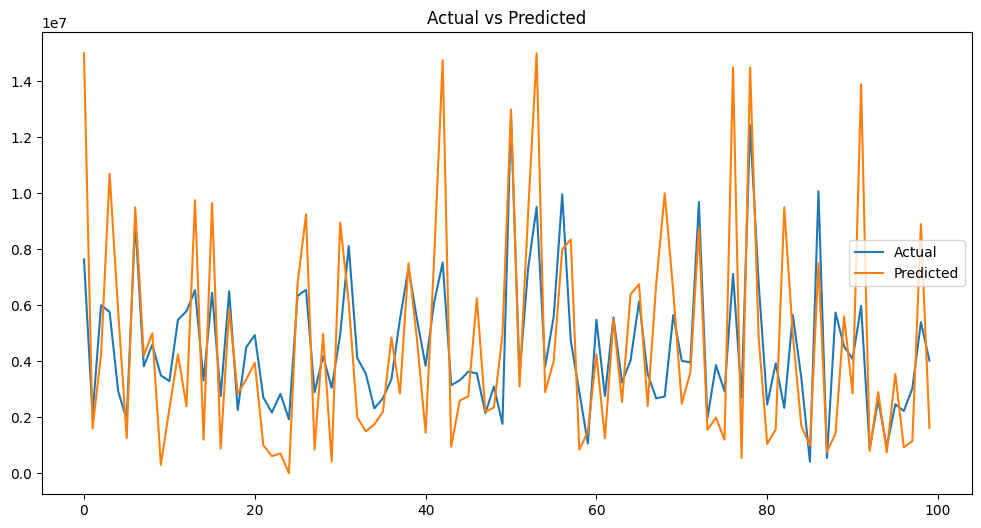

In [92]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train, y_train)
y_predict_ridge = ridge.predict(x_test)

print("Mean Absolute Error: ", mean_absolute_error(y_test, y_predict_ridge))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_predict_ridge)))
print("Coefficient of Determination R^2: ", r2_score(y_test, y_predict_ridge))

fig = plt.figure(figsize=(12, 6))
result = pd.DataFrame({"Predicted": y_predict_ridge, "Actual": y_test})
result = result.reset_index()
result = result.drop(["index"],axis=1)

plt.plot(result[:100])
plt.legend(["Actual","Predicted"])
plt.title("Actual vs Predicted")
plt.show()


Mean Absolute Error:  1870289.3272541373
Root Mean Squared Error:  2637415.802576491
Coefficient of Determination R^2:  0.4805978547265378


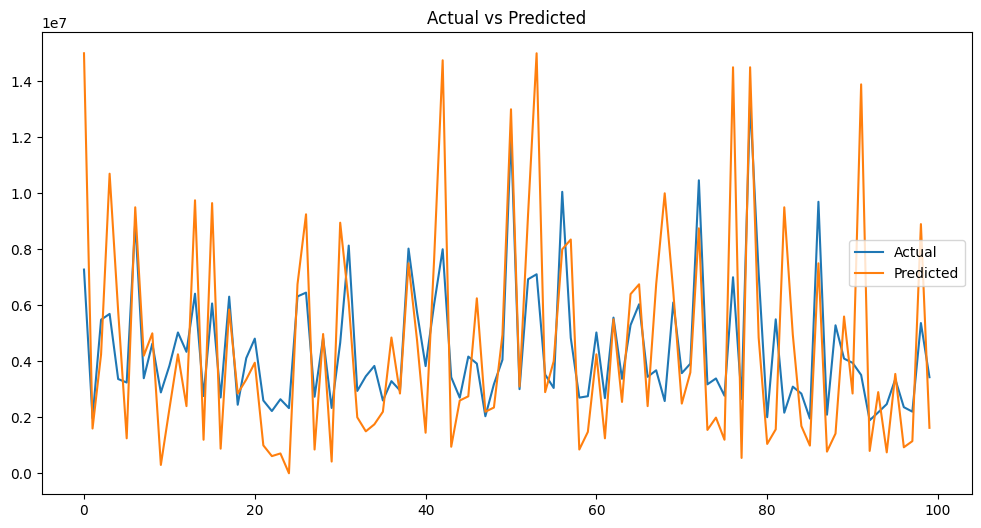

In [93]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
elastic_net.fit(x_train, y_train)
y_predict_elastic_net = elastic_net.predict(x_test)

print("Mean Absolute Error: ", mean_absolute_error(y_test, y_predict_elastic_net))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_predict_elastic_net)))
print("Coefficient of Determination R^2: ", r2_score(y_test, y_predict_elastic_net))

fig = plt.figure(figsize=(12, 6))
result = pd.DataFrame({"Predicted": y_predict_elastic_net, "Actual": y_test})
result = result.reset_index()
result = result.drop(["index"],axis=1)

plt.plot(result[:100])
plt.legend(["Actual","Predicted"])
plt.title("Actual vs Predicted")
plt.show()

Bayesian Ridge Regression:
Mean Absolute Error:  1838250.656050236
Root Mean Squared Error:  2550894.3134341943
Coefficient of Determination R^2:  0.5141172707293873


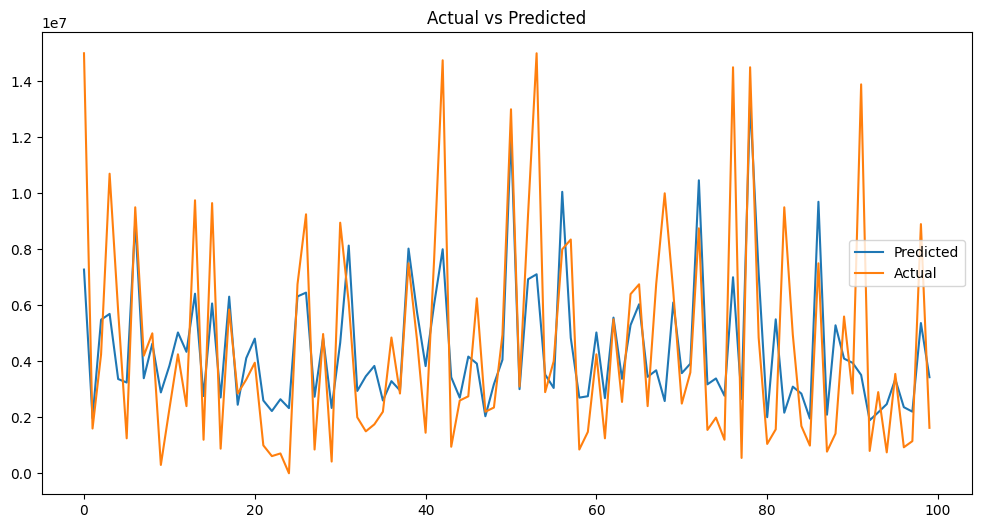

In [94]:
from sklearn.linear_model import BayesianRidge

bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(x_train, y_train)
y_predict_bayesian_ridge = bayesian_ridge.predict(x_test)

print("Bayesian Ridge Regression:")
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_predict_bayesian_ridge))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_predict_bayesian_ridge)))
print("Coefficient of Determination R^2: ", r2_score(y_test, y_predict_bayesian_ridge))

fig = plt.figure(figsize=(12, 6))
result = pd.DataFrame({"Predicted": y_predict_elastic_net, "Actual": y_test})
result = result.reset_index()
result = result.drop(["index"],axis=1)

plt.plot(result[:100])
plt.legend(["Predicted", "Actual"])
plt.title("Actual vs Predicted")
plt.show()

In [95]:
import joblib
joblib.dump(bayesian_ridge, "bayesian_ridge_model.sav")

['bayesian_ridge_model.sav']